In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
dat = pd.read_csv("fifa_22_fut_players_cleaned.csv", index_col=0)

In [155]:
dat.head()

,Name,Ratings,Position,Version,PS,SKI,WF,WR,PAC,SHO,...,PHY,Popularity,BS,IGS,Club,League,Country,Height(cm),Weight(kg),Body Type
0,Pelé,99,CAM,Icon Moments,3800000.0,5,4,H \ M,96,97,...,79,2392,527,2563,FUT 22 ICONS,Icons,Brazil,173,70,Unique
1,Lionel Messi,99,CF,ShapeShifters,2200000.0,5,4,H \ L,95,98,...,78,4336,511,2485,Paris SG,Ligue 1,Argentina,170,72,Messi
2,Cristiano Ronaldo,99,LW,ShapeShifters,2350000.0,5,4,H \ L,99,99,...,92,4752,527,2549,Manchester Utd,Premier League,Portugal,187,83,CR7
3,Raphaël Varane,99,CB,Premium Futties SBC,818750.0,2,3,M \ H,96,61,...,98,2208,517,2378,Manchester Utd,Premier League,France,191,81,Unique
4,Ousmane Dembélé,99,RW,Premium Futties,1160000.0,5,5,H \ M,99,96,...,79,1861,516,2488,FC Barcelona,LaLiga Santander,France,178,67,Unique


In [156]:
dat.describe()

,Ratings,PS,SKI,WF,PAC,SHO,PAS,DRI,DEF,PHY,Popularity,BS,IGS,Height(cm),Weight(kg)
count,12697.000000,1.269700e+04,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000,12697.000000
mean,72.275892,1.481808e+04,2.657872,3.123494,72.039222,60.355911,64.521777,69.455777,54.895330,70.172954,194.069702,391.411436,1756.031267,181.537135,75.566669
std,7.946926,1.059803e+05,0.896758,0.727009,12.201801,15.658882,11.045412,10.666093,17.199339,9.390928,1091.993751,47.561510,370.566902,6.814323,7.202161
min,63.000000,2.000000e+02,1.000000,1.000000,28.000000,18.000000,31.000000,33.000000,15.000000,34.000000,-35667.000000,0.000000,590.000000,158.000000,0.000000
25%,66.000000,8.000000e+02,2.000000,3.000000,65.000000,50.000000,58.000000,64.000000,40.000000,65.000000,1.000000,361.000000,1636.000000,177.000000,70.000000
50%,70.000000,1.200000e+03,3.000000,3.000000,72.000000,63.000000,64.000000,69.000000,59.000000,70.000000,4.000000,382.000000,1779.000000,182.000000,75.000000
75%,75.000000,1.500000e+03,3.000000,4.000000,80.000000,70.000000,70.000000,75.000000,67.000000,76.000000,22.000000,412.000000,1942.000000,186.000000,80.000000
max,99.000000,4.500000e+06,5.000000,5.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,30338.000000,572.000000,2751.000000,203.000000,110.000000


### EDA:
  * ratings from 60 to 70, 70 to 80, 80 to 90, 90 to 100
  * average rating for each position 
  * most popular Club
  * version to rating and ps 
  * different body types 

In [157]:
ratings = []
rating = ["60-70%", "70-80%", "80-90%", "90-100%"]

In [158]:
ratings.append(dat[(dat.Ratings >= 60) & (dat.Ratings < 70)].value_counts().sum())
ratings.append(dat[(dat.Ratings >= 70) & (dat.Ratings < 80)].value_counts().sum()) 
ratings.append(dat[(dat.Ratings >= 80) & (dat.Ratings < 90)].value_counts().sum())
ratings.append(dat[(dat.Ratings >= 90) & (dat.Ratings < 100)].value_counts().sum())

Text(0.5, 1.0, 'players ratings')

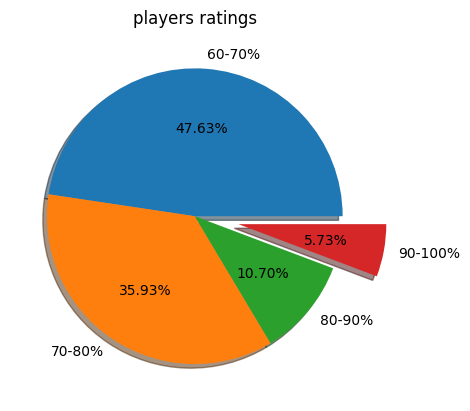

In [159]:
plt.pie(ratings, labels=rating, autopct="%.2f%%", explode=[0,0,0,0.3], shadow=True)
plt.title("players ratings")

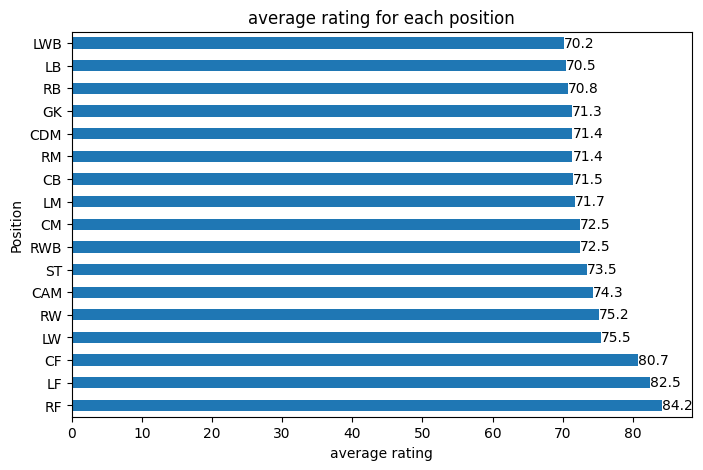

In [160]:
plt.figure(figsize=(8,5 ))

position_avg = dat.groupby("Position")['Ratings'].mean().sort_values(ascending=False).apply(lambda x: round(x, ndigits=1)).plot(kind='barh')
plt.xlabel("average rating")
plt.title("average rating for each position");
for c in position_avg.containers:
    position_avg.bar_label(c)

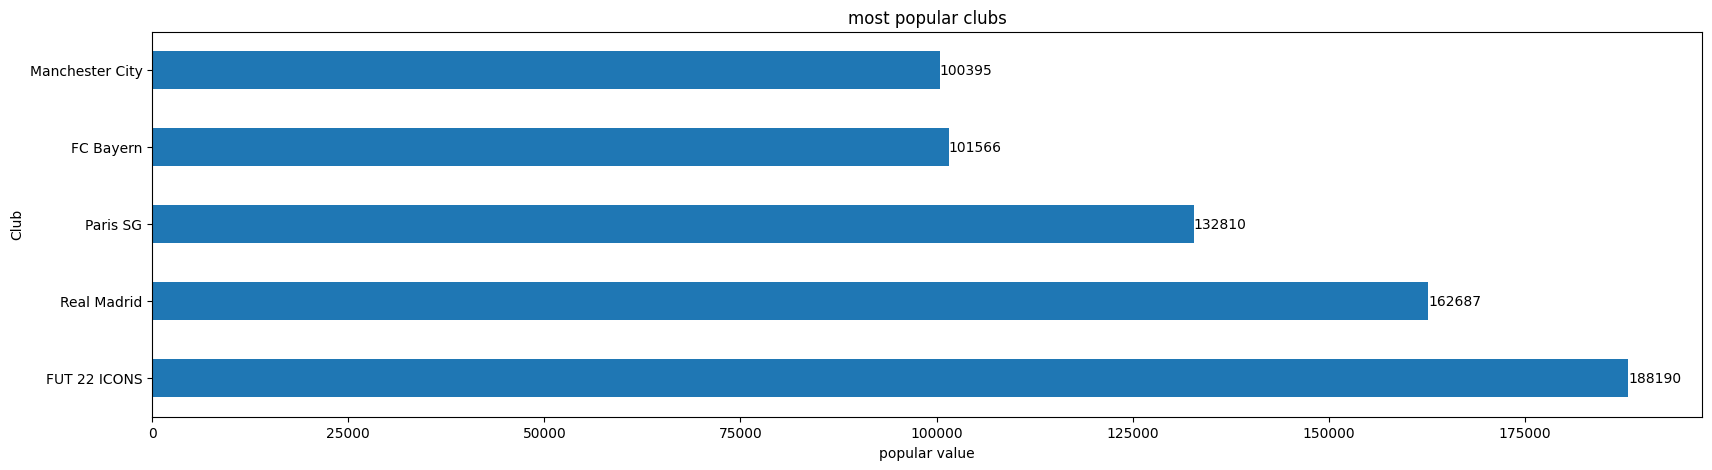

In [161]:
plt.figure(figsize=(20, 5))
club = dat.groupby("Club")['Popularity'].sum().sort_values(ascending=False).head().plot(kind="barh")
plt.xlabel("popular value")
plt.title("most popular clubs")
for c in club.containers:
  club.bar_label(c)


In [162]:
dat.Version.value_counts().sort_values(ascending=False).head()

Normal          8081
non-rare        1316
Rare             930
Libertadores     330
Sudamericana     302
Name: Version, dtype: int64

In [163]:
dat.groupby(["Body Type", "Position"])["PS"].sum().sort_values(ascending=False)[:10]

Body Type        Position
 Unique          ST          13592950.0
 High & Average  CB           9755850.0
 Average         ST           8833200.0
 Unique          CAM          8650600.0
 Average         CM           6781150.0
                 CB           6442400.0
 Unique          CM           6144900.0
 Lean            ST           4916600.0
                 CM           4768950.0
                 CDM          4747200.0
Name: PS, dtype: float64

In [164]:
dat.Position.value_counts()

CB     2134
ST     1941
CM     1407
CDM    1152
GK     1136
RB      838
LB      826
CAM     803
LM      691
RM      670
RW      340
LW      300
CF      174
LWB     135
RWB     130
LF       14
RF        6
Name: Position, dtype: int64

In [165]:
dat[(dat.SKI == 5) & (dat.PS > 1000000)].sort_values(by="PS", ascending=False).head()

,Name,Ratings,Position,Version,PS,SKI,WF,WR,PAC,SHO,...,PHY,Popularity,BS,IGS,Club,League,Country,Height(cm),Weight(kg),Body Type
0,Pelé,99,CAM,Icon Moments,3800000.0,5,4,H \ M,96,97,...,79,2392,527,2563,FUT 22 ICONS,Icons,Brazil,173,70,Unique
100,Antoine Griezmann,96,ST,Premium Futties SBC,2450000.0,5,5,H \ M,95,96,...,81,2677,524,2565,Atlético de Madrid,LaLiga Santander,France,176,73,Unique
2,Cristiano Ronaldo,99,LW,ShapeShifters,2350000.0,5,4,H \ L,99,99,...,92,4752,527,2549,Manchester Utd,Premier League,Portugal,187,83,CR7
1,Lionel Messi,99,CF,ShapeShifters,2200000.0,5,4,H \ L,95,98,...,78,4336,511,2485,Paris SG,Ligue 1,Argentina,170,72,Messi
56,Paul Pogba,97,CM,ShowDown SBC,2100000.0,5,5,H \ M,94,92,...,94,958,566,2730,Piemonte Calcio,Serie A TIM,France,191,84,Unique


In [166]:
dat.loc[dat.PS.sort_values(ascending=False).head().index]

,Name,Ratings,Position,Version,PS,SKI,WF,WR,PAC,SHO,...,PHY,Popularity,BS,IGS,Club,League,Country,Height(cm),Weight(kg),Body Type
32,Rúben Dias,97,CB,TOTY,4500000.0,2,4,M \ H,87,50,...,96,6017,495,2310,Manchester City,Premier League,Portugal,187,82,High & Average
0,Pelé,99,CAM,Icon Moments,3800000.0,5,4,H \ M,96,97,...,79,2392,527,2563,FUT 22 ICONS,Icons,Brazil,173,70,Unique
360,Marcel Schmelzer,93,LB,Premium SBC,2590000.0,3,3,M \ H,95,71,...,92,2436,529,2558,Dortmund,Bundesliga,Germany,180,74,Average
100,Antoine Griezmann,96,ST,Premium Futties SBC,2450000.0,5,5,H \ M,95,96,...,81,2677,524,2565,Atlético de Madrid,LaLiga Santander,France,176,73,Unique
2,Cristiano Ronaldo,99,LW,ShapeShifters,2350000.0,5,4,H \ L,99,99,...,92,4752,527,2549,Manchester Utd,Premier League,Portugal,187,83,CR7


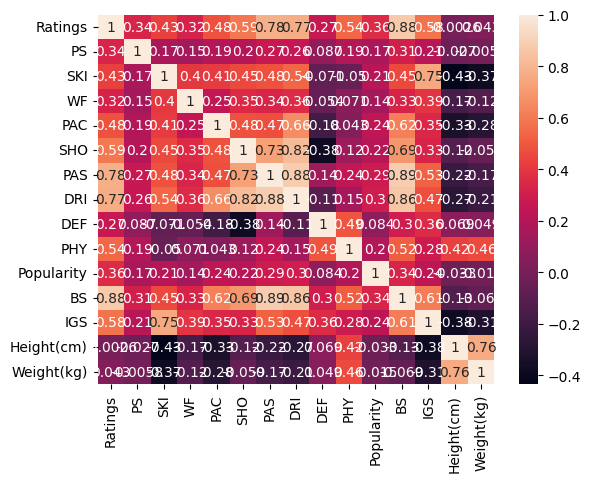

In [167]:
import seaborn as sns

heat = dat.corr(numeric_only=True)
sns.heatmap(heat, annot=True);

In [168]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12697 entries, 0 to 17077
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        12697 non-null  object 
 1   Ratings     12697 non-null  int64  
 2   Position    12697 non-null  object 
 3   Version     12697 non-null  object 
 4   PS          12697 non-null  float64
 5   SKI         12697 non-null  int64  
 6   WF          12697 non-null  int64  
 7   WR          12697 non-null  object 
 8   PAC         12697 non-null  int64  
 9   SHO         12697 non-null  int64  
 10  PAS         12697 non-null  int64  
 11  DRI         12697 non-null  int64  
 12  DEF         12697 non-null  int64  
 13  PHY         12697 non-null  int64  
 14  Popularity  12697 non-null  int64  
 15  BS          12697 non-null  int64  
 16  IGS         12697 non-null  int64  
 17  Club        12697 non-null  object 
 18  League      12697 non-null  object 
 19  Country     12697 non-nul